In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Read Data

In [30]:
data = pd.read_csv('Data/train.csv')

# Split Data

In [31]:
train, test = train_test_split(data,random_state=4,test_size=0.15)

In [32]:
train.Levy

7985     585
17987    503
13718      -
4184       -
5814       -
        ... 
16840    308
11863    730
17093    779
8366       -
17530      -
Name: Levy, Length: 16351, dtype: object

# Understand Data 1

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16351 entries, 7985 to 17530
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                16351 non-null  int64  
 1   Price             16351 non-null  int64  
 2   Levy              16351 non-null  object 
 3   Manufacturer      16351 non-null  object 
 4   Model             16351 non-null  object 
 5   Prod. year        16351 non-null  int64  
 6   Category          16351 non-null  object 
 7   Leather interior  16351 non-null  object 
 8   Fuel type         16351 non-null  object 
 9   Engine volume     16351 non-null  object 
 10  Mileage           16351 non-null  object 
 11  Cylinders         16351 non-null  float64
 12  Gear box type     16351 non-null  object 
 13  Drive wheels      16351 non-null  object 
 14  Doors             16351 non-null  object 
 15  Wheel             16351 non-null  object 
 16  Color             16351 non-null  obj

### Check the target variable

/tmp/ipykernel_132692/4162902265.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


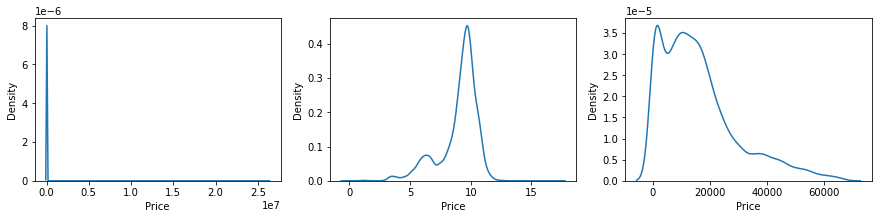

In [5]:
#keep data between higher and lower bracket
lower_b = np.percentile(train["Price"], 3)
higher_b = np.percentile(train["Price"], 98)

data_kept = train[(train["Price"]>lower_b) & (train['Price']<higher_b)]

# compare data with data kept
fig, ax =plt.subplots(1,3, figsize=(15,3))
sns.kdeplot(train["Price"],ax=ax[0])
sns.kdeplot(np.log(train["Price"]),ax=ax[1])
sns.kdeplot(data_kept["Price"],ax=ax[2])
fig.show()

### Visualize Numerical Columns

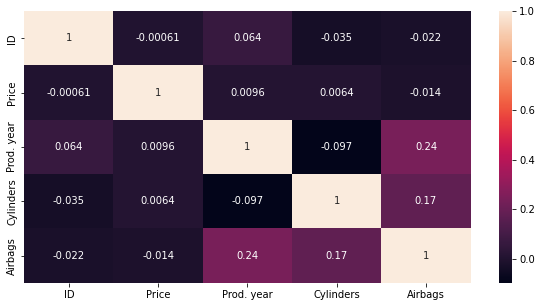

In [6]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(), annot=True)
plt.show()

**Observation**

- we can see a very less correlation numbers we are having with the numerical columns
- the lowest is the ID so we can remove the same

### Visualize categorical columns

In [7]:
categorical_cols = train.select_dtypes(include=np.object).columns.tolist()
categorical_cols

/tmp/ipykernel_132692/165846985.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_cols = train.select_dtypes(include=np.object).columns.tolist()


['Levy',
 'Manufacturer',
 'Model',
 'Category',
 'Leather interior',
 'Fuel type',
 'Engine volume',
 'Mileage',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color']

In [9]:
for i in categorical_cols:
    print(i, end = ",")

Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color,

#### Get unique values of each columns

In [10]:
data_length = pd.DataFrame({'Col_name':[], 'Length':[]})
c_name = []
u_length = []
for i in categorical_cols:
    c_name.append(i)
    u_length.append(len(train[i].unique()))

data_length['Col_name'] = c_name
data_length['Length'] = u_length

data_length

,Col_name,Length
0,Levy,526
1,Manufacturer,64
2,Model,1435
3,Category,11
4,Leather interior,2
5,Fuel type,7
6,Engine volume,107
7,Mileage,6801
8,Gear box type,4
9,Drive wheels,3


In [13]:
def null_impute(data, col):
    if data[col].dtypes == 'O':
        levy_list = []
        for i in data[col]:
            if i == '-':
                levy_list.append(np.nan)
            else:
                levy_list.append(int(i))
        data[col] = levy_list
    return data

/tmp/ipykernel_132692/2928197502.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.kdeplot(null_impute(train, 'Levy').fillna(null_impute(train, 'Levy').mean())['Levy'], ax=ax[0])
/tmp/ipykernel_132692/2928197502.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


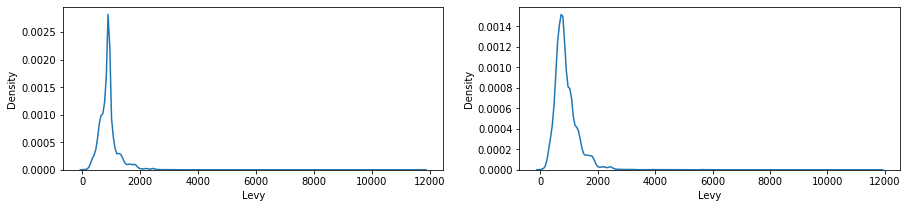

In [16]:
fig, ax =plt.subplots(1,2, figsize=(15,3))
sample = train
sns.kdeplot(null_impute(train, 'Levy').fillna(null_impute(train, 'Levy').mean())['Levy'], ax=ax[0])
sample['Levy'] = sample['Levy'].apply(handle_levy)
sns.kdeplot(sample['Levy'], ax =ax[1])
fig.show()

In [15]:
def handle_engine_volume(ele):
  val =  float(str(ele).split(" ")[0])
  return val if val!=np.nan else 0

def handle_levy(x):
  if x=='-':
    return 0
  else:
    return float(x)

def handle_mileage(x):
  return float(x.split(" ")[0])


train["Levy"] = train["Levy"].apply(handle_levy)
train["Engine volume"] = train["Engine volume"].apply(handle_engine_volume)
train["Mileage"] = train["Mileage"].apply(handle_mileage)

In [17]:
lower_b = np.percentile(train["Price"], 3)
higher_b = np.percentile(train["Price"], 98)

train_outliers = train[(train["Price"]<=lower_b) | (train['Price']>=higher_b)]
train = train[(train["Price"]>lower_b) & (train['Price']<higher_b)]

In [18]:
# DROP ID
train = train.drop(["ID"], axis=1)

numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
numeric_cols = [x for x in numeric_cols if x!="Price"]
cat_cols = [x for x in train.columns if x not in numeric_cols and x!="Price"]


print(numeric_cols)
print(cat_cols)

['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [19]:
for i in numeric_cols:
    print(i, end = ",")

Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags,

In [20]:
# Handle Categorical Features
label_encoders = {}
for col_name in cat_cols:
  encoder = LabelEncoder()
  encoder.fit(train[col_name])
  # for outlier_classses in list(df_train_outliers[col_name].unique()):
  #   encoder.classes_ = np.append(encoder.classes_, outlier_classses) 
  # for outlier_classses in list(df_test[col_name].unique()):
  #   encoder.classes_ = np.append(encoder.classes_, outlier_classses)
  label_encoders[col_name] = encoder


# Handle Numerical Features
scalers= {}
for col_name in numeric_cols:
  scaler = StandardScaler()
  scaler.fit(train[col_name].values.reshape(-1,1))
  scalers[col_name] = scaler


for col in cat_cols:
  train[col] = label_encoders[col].transform(train[col])

for col in numeric_cols:
  train[col] = scalers[col].transform(train[col].values.reshape(-1, 1)).squeeze()

from sklearn.model_selection import train_test_split

X = train.drop("Price", axis=1)
# y = np.log(df_train["Price"])
y = train["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(13146, 16)
(13146,)
(2321, 16)
(2321,)


In [21]:
scalers

{'Levy': StandardScaler(),
 'Prod. year': StandardScaler(),
 'Engine volume': StandardScaler(),
 'Mileage': StandardScaler(),
 'Cylinders': StandardScaler(),
 'Airbags': StandardScaler()}

In [22]:
X_train

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
14294,-1.246727,55,989,0.916189,3,1,2,-0.923643,-0.022188,-0.474253,0,1,1,0,1,1.260755
42,-0.558580,58,763,0.916189,9,1,5,-1.039865,-0.029359,-0.474253,2,1,1,0,1,0.329374
12293,NaN,55,431,-0.688767,9,0,5,-1.039865,-0.024330,-0.474253,1,1,1,0,1,-0.136317
12172,-0.585654,27,924,0.559532,9,1,5,-0.342534,-0.028496,-0.474253,0,1,1,0,1,-0.602008
3497,-0.581142,53,1114,0.381203,9,1,5,-0.342534,-0.024770,-0.474253,0,1,1,0,11,-1.533389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12299,NaN,15,1213,-0.153782,6,0,5,0.819684,-0.024984,1.244816,2,2,1,1,6,1.027910
6742,0.271710,34,844,0.024547,4,1,1,0.819684,-0.029641,1.244816,0,0,1,0,1,1.260755
3282,-0.702978,55,989,0.202875,3,1,2,-0.574977,-0.019272,-0.474253,0,1,1,0,2,1.260755
17998,NaN,4,125,-1.937066,9,1,5,0.238575,-0.029213,1.244816,1,2,1,1,6,-0.602008


In [29]:
y_train

14294      251
42       20165
12293    11290
12172    14113
3497      1411
         ...  
12299    14113
6742      2666
3282       314
17998     7527
10682     7840
Name: Price, Length: 13146, dtype: int64

In [27]:
for i in X_test.columns:
    print(i, end=", ")

Levy, Manufacturer, Model, Prod. year, Category, Leather interior, Fuel type, Engine volume, Mileage, Cylinders, Gear box type, Drive wheels, Doors, Wheel, Color, Airbags, 

In [24]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

def print_scores(model, log_used=False):
  if log_used:
    print("RMSE on Train Data: ", mean_squared_error(y_train, np.exp(model.predict(X_train)),squared=False))
    print("RMSE on Test Data: ", mean_squared_error(y_test, np.exp(model.predict(X_test)),squared=False))

    print("R2 on Train Data: ",  r2_score(y_train, np.exp(model.predict(X_train))))
    print("R2 on Test Data: ",  r2_score(y_test, np.exp(model.predict(X_test))))
  else:
    print("RMSE on Train Data: ", mean_squared_error(y_train, model.predict(X_train),squared=False))
    print("RMSE on Test Data: ", mean_squared_error(y_test, model.predict(X_test),squared=False))

    print("R2 on Train Data: ",  r2_score(y_train,model.predict(X_train)))
    print("R2 on Test Data: ",  r2_score(y_test, model.predict(X_test)))


In [95]:
def print_scores_valid(model, log_used=False):
  if log_used:
    print("RMSE on Test Data: ", mean_squared_error(y_test, np.exp(model.predict(X_test)),squared=False))
    print("RMSE on valid Data: ", mean_squared_error(y_valid, np.exp(model.predict(X_valid)),squared=False))

    print("R2 on Test Data: ",  r2_score(y_test, np.exp(model.predict(X_test))))
    print("R2 on valid Data: ",  r2_score(y_valid, np.exp(model.predict(X_valid))))
  else:
    print("RMSE on Test Data: ", mean_squared_error(y_test, model.predict(X_test),squared=False))
    print("RMSE on valid Data: ", mean_squared_error(y_valid, model.predict(X_valid),squared=False))

    print("R2 on Test Data: ",  r2_score(y_test,model.predict(X_test)))
    print("R2 on valid Data: ",  r2_score(y_valid, model.predict(X_valid)))


## Modeling

#### Linear Regression

In [72]:
from sklearn.linear_model import LinearRegression

 
lr_model = LinearRegression().fit(X_train, y_train)

print_scores(lr_model)

RMSE on Train Data:  10600.715447973447
RMSE on Test Data:  10451.205043769589
R2 on Train Data:  0.2186955733842787
R2 on Test Data:  0.22384172911720646


#### Ridge

In [73]:
from sklearn.linear_model import Ridge
ridge_model = Ridge().fit(X_train, y_train)

print_scores(ridge_model)
# print_scores(ridge_model, log_used=True)


RMSE on Train Data:  10600.71560088402
RMSE on Test Data:  10451.227273837885
R2 on Train Data:  0.2186955508443459
R2 on Test Data:  0.22383842728365744


#### Decision Tree

In [74]:
from sklearn import tree

dt_model = tree.DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)

print_scores(dt_model)
# print_scores(dt_model, log_used=True)

RMSE on Train Data:  5848.3636919228165
RMSE on Test Data:  7218.6602480031725
R2 on Train Data:  0.7621962628862964
R2 on Test Data:  0.6297195721283324


#### Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth=50,n_estimators=500).fit(X_train, y_train)

print_scores(rf)

RMSE on Train Data:  2604.54562830906
RMSE on Test Data:  6094.366376958313
R2 on Train Data:  0.9624245815080252
R2 on Test Data:  0.8018906790809195


In [107]:
cols = list(X_train.columns)
pd.Series(rf.feature_importances_, index=cols)

Levy                0.074514
Manufacturer        0.034611
Model               0.071196
Prod. year          0.215360
Category            0.014310
Leather interior    0.016959
Fuel type           0.067451
Engine volume       0.103890
Mileage             0.117845
Cylinders           0.009541
Gear box type       0.064652
Drive wheels        0.021373
Doors               0.002224
Wheel               0.001550
Color               0.025643
Airbags             0.158882
dtype: float64

#### Score with Alien Data 

In [104]:
valid = pd.read_csv('Data/test_data.csv').iloc[:,1:]
valid = inference_pipeline(valid, label_encoders, scalers)
X_valid = valid.drop('Price', axis=1)
y_valid = valid['Price']

print_scores_valid(rf)

['Levy', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Airbags']
['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']
RMSE on Test Data:  6087.870669426863
RMSE on valid Data:  8781.099700869596
R2 on Test Data:  0.8023127654228127
R2 on valid Data:  0.7180161953714395


In [336]:
scalers

{'Levy': StandardScaler(),
 'Prod. year': StandardScaler(),
 'Engine volume': StandardScaler(),
 'Mileage': StandardScaler(),
 'Cylinders': StandardScaler(),
 'Airbags': StandardScaler()}

## Inference Pipeline

In [103]:
def inference_pipeline(train,label_encoders, scalers):
    def handle_engine_volume(ele):
        val =  float(str(ele).split(" ")[0])
        return val if val!=np.nan else 0

    def handle_levy(x):
        if x=='-':
            return 0
        else:
            return float(x)

    def handle_mileage(x):
        return float(x.split(" ")[0])
    
#     def handle_model(x):
#         return x.lower()

    if 'ID' in train.columns: 
        train = train.drop(["ID"], axis=1)
        
    
    train["Levy"] = train["Levy"].apply(handle_levy)
#     train['Model'] = train['Model'].apply(handle_model)
    train["Engine volume"] = train["Engine volume"].apply(handle_engine_volume)
    train["Mileage"] = train["Mileage"].apply(handle_mileage)
    
    numeric_cols = train.select_dtypes(include=np.number).columns.tolist()
    numeric_cols = [x for x in numeric_cols if x!="Price"]
    cat_cols = [x for x in train.columns if x not in numeric_cols and x!="Price"]

    print(numeric_cols)
    print(cat_cols)
    
    for i in cat_cols:
        if '<unknown>' not in label_encoders[i].classes_ :
            train[i] = train[i].map(lambda s: '<unknown>' if s not in label_encoders[i].classes_ else s)
            label_encoders[i].classes_ = np.append(label_encoders[i].classes_, '<unknown>')
        else:
            train[i] = train[i].map(lambda s: '<unknown>' if s not in label_encoders[i].classes_ else s)
    
    for col in cat_cols:
        train[col] = label_encoders[col].transform(train[col])

    for col in numeric_cols:
        train[col] = scalers[col].transform(train[col].values.reshape(-1, 1)).squeeze()
                                      
    return train

In [368]:
with open('Model.pkl', 'wb') as f:
    p = pickle.Pickler(f)
    p.fast = True
    p.dump(rf)

In [338]:
import pickle
with open('encoder.pkl', 'wb') as f:
    p = pickle.Pickler(f)
    p.fast = True
    p.dump(label_encoders)

with open('scalar.pkl', 'wb') as f:
    p = pickle.Pickler(f)
    p.fast = True
    p.dump(scalers)

## Model Hyper-parameter tuning

In [124]:
import sklearn
from sklearn.model_selection import cross_val_score
import optuna

# 1. Define an objective function to be maximized.
def objective(trial):

    # 2. Suggest values for the hyperparameters using a trial object.
    rf_max_depth = trial.suggest_int('rf_max_depth', 10, 50, log=False)
    estim = trial.suggest_int('estim', 100, 500, log=False)

    obj = RandomForestRegressor(max_depth=rf_max_depth, n_estimators=estim)
    score = cross_val_score(obj, X_train, y_train , n_jobs=-1, cv=4)
    score_test = cross_val_score(obj, X_test, y_test , n_jobs=-1, cv=4)
    accuracy = score.mean()   
    accuracy1 = score_test.mean() 
    print(accuracy)
    return accuracy1


# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=70)
study.best_trial

[I 2022-07-15 02:06:29,060] A new study created in memory with name: no-name-b13cfe53-c1d4-4fb2-9b0d-2e088359e572
[I 2022-07-15 02:07:06,315] Trial 0 finished with value: 0.6921144624453226 and parameters: {'rf_max_depth': 24, 'estim': 312}. Best is trial 0 with value: 0.6921144624453226.


0.7752295232628507


[I 2022-07-15 02:07:28,642] Trial 1 finished with value: 0.6875336053561754 and parameters: {'rf_max_depth': 13, 'estim': 251}. Best is trial 0 with value: 0.6921144624453226.


0.7615857033198297


[I 2022-07-15 02:07:40,441] Trial 2 finished with value: 0.6898059133415573 and parameters: {'rf_max_depth': 29, 'estim': 103}. Best is trial 0 with value: 0.6921144624453226.


0.7730023949444313


[I 2022-07-15 02:08:09,896] Trial 3 finished with value: 0.6910338214525911 and parameters: {'rf_max_depth': 30, 'estim': 261}. Best is trial 0 with value: 0.6921144624453226.


0.7751100181592773


[I 2022-07-15 02:08:44,344] Trial 4 finished with value: 0.6906825288376329 and parameters: {'rf_max_depth': 23, 'estim': 304}. Best is trial 0 with value: 0.6921144624453226.


0.7758012909614971


[I 2022-07-15 02:09:28,494] Trial 5 finished with value: 0.6919533761862051 and parameters: {'rf_max_depth': 32, 'estim': 392}. Best is trial 0 with value: 0.6921144624453226.


0.7747739093455348


[I 2022-07-15 02:10:19,094] Trial 6 finished with value: 0.6900037763141642 and parameters: {'rf_max_depth': 21, 'estim': 425}. Best is trial 0 with value: 0.6921144624453226.


0.7743584600565702


[I 2022-07-15 02:10:34,392] Trial 7 finished with value: 0.6905940132943602 and parameters: {'rf_max_depth': 49, 'estim': 129}. Best is trial 0 with value: 0.6921144624453226.


0.773749283507615


[I 2022-07-15 02:11:07,102] Trial 8 finished with value: 0.6902140375719952 and parameters: {'rf_max_depth': 36, 'estim': 289}. Best is trial 0 with value: 0.6921144624453226.


0.7751683203029205


[I 2022-07-15 02:11:43,480] Trial 9 finished with value: 0.6921089963220112 and parameters: {'rf_max_depth': 22, 'estim': 329}. Best is trial 0 with value: 0.6921144624453226.


0.7753609440279075


[I 2022-07-15 02:12:18,617] Trial 10 finished with value: 0.6801943737231178 and parameters: {'rf_max_depth': 10, 'estim': 498}. Best is trial 0 with value: 0.6921144624453226.


0.7256637909151498


[I 2022-07-15 02:12:58,124] Trial 11 finished with value: 0.6910076284455182 and parameters: {'rf_max_depth': 20, 'estim': 362}. Best is trial 0 with value: 0.6921144624453226.


0.7745941444122206


[I 2022-07-15 02:13:22,816] Trial 12 finished with value: 0.6899300027051598 and parameters: {'rf_max_depth': 39, 'estim': 215}. Best is trial 0 with value: 0.6921144624453226.


0.7747456976027205


[I 2022-07-15 02:13:55,824] Trial 13 finished with value: 0.6905702447058129 and parameters: {'rf_max_depth': 15, 'estim': 342}. Best is trial 0 with value: 0.6921144624453226.


0.76929560275077


[I 2022-07-15 02:14:16,159] Trial 14 finished with value: 0.6898216150177561 and parameters: {'rf_max_depth': 25, 'estim': 180}. Best is trial 0 with value: 0.6921144624453226.


0.7746415801748439


[I 2022-07-15 02:15:04,810] Trial 15 finished with value: 0.6913650510731841 and parameters: {'rf_max_depth': 40, 'estim': 432}. Best is trial 0 with value: 0.6921144624453226.


0.7757024878604697


[I 2022-07-15 02:15:39,836] Trial 16 finished with value: 0.6893678172479502 and parameters: {'rf_max_depth': 19, 'estim': 327}. Best is trial 0 with value: 0.6921144624453226.


0.7741225934361151


[I 2022-07-15 02:16:22,749] Trial 17 finished with value: 0.6926403166452864 and parameters: {'rf_max_depth': 27, 'estim': 380}. Best is trial 17 with value: 0.6926403166452864.


0.7749118519696053


[I 2022-07-15 02:17:13,816] Trial 18 finished with value: 0.6914625661463759 and parameters: {'rf_max_depth': 27, 'estim': 451}. Best is trial 17 with value: 0.6926403166452864.


0.7746235357706888


[I 2022-07-15 02:17:56,428] Trial 19 finished with value: 0.6928204440242665 and parameters: {'rf_max_depth': 34, 'estim': 380}. Best is trial 19 with value: 0.6928204440242665.


0.7746882089099847


[I 2022-07-15 02:18:39,667] Trial 20 finished with value: 0.6914755332625433 and parameters: {'rf_max_depth': 47, 'estim': 382}. Best is trial 19 with value: 0.6928204440242665.


0.7753836372351962


[I 2022-07-15 02:19:25,535] Trial 21 finished with value: 0.6924380198071545 and parameters: {'rf_max_depth': 33, 'estim': 406}. Best is trial 19 with value: 0.6928204440242665.


0.7750456591487472


[I 2022-07-15 02:20:19,648] Trial 22 finished with value: 0.691446919822921 and parameters: {'rf_max_depth': 35, 'estim': 482}. Best is trial 19 with value: 0.6928204440242665.


0.7757391628775454


[I 2022-07-15 02:21:04,688] Trial 23 finished with value: 0.6932228613119665 and parameters: {'rf_max_depth': 43, 'estim': 399}. Best is trial 23 with value: 0.6932228613119665.


0.7744556685857124


[I 2022-07-15 02:21:45,639] Trial 24 finished with value: 0.6900054694317115 and parameters: {'rf_max_depth': 44, 'estim': 364}. Best is trial 23 with value: 0.6932228613119665.


0.7747025543223919


[I 2022-07-15 02:22:38,474] Trial 25 finished with value: 0.6932191774641319 and parameters: {'rf_max_depth': 42, 'estim': 459}. Best is trial 23 with value: 0.6932228613119665.


0.7755161328889323


[I 2022-07-15 02:23:30,402] Trial 26 finished with value: 0.6924078273092089 and parameters: {'rf_max_depth': 42, 'estim': 461}. Best is trial 23 with value: 0.6932228613119665.


0.7749993083711315


[I 2022-07-15 02:24:16,586] Trial 27 finished with value: 0.6920457785809535 and parameters: {'rf_max_depth': 45, 'estim': 411}. Best is trial 23 with value: 0.6932228613119665.


0.7755857537300206


[I 2022-07-15 02:25:08,164] Trial 28 finished with value: 0.6910644215707118 and parameters: {'rf_max_depth': 39, 'estim': 457}. Best is trial 23 with value: 0.6932228613119665.


0.7746339687012551


[I 2022-07-15 02:25:57,042] Trial 29 finished with value: 0.6908397463242666 and parameters: {'rf_max_depth': 36, 'estim': 437}. Best is trial 23 with value: 0.6932228613119665.


0.7756032507925309


[I 2022-07-15 02:26:52,401] Trial 30 finished with value: 0.6926843259740514 and parameters: {'rf_max_depth': 42, 'estim': 486}. Best is trial 23 with value: 0.6932228613119665.


0.7756168063252038


[I 2022-07-15 02:27:46,507] Trial 31 finished with value: 0.6911018850238531 and parameters: {'rf_max_depth': 42, 'estim': 478}. Best is trial 23 with value: 0.6932228613119665.


0.7752663532430565


[I 2022-07-15 02:28:42,258] Trial 32 finished with value: 0.6917277237643664 and parameters: {'rf_max_depth': 50, 'estim': 496}. Best is trial 23 with value: 0.6932228613119665.


0.7750532547828468


[I 2022-07-15 02:29:35,461] Trial 33 finished with value: 0.6904457662482604 and parameters: {'rf_max_depth': 46, 'estim': 470}. Best is trial 23 with value: 0.6932228613119665.


0.7747357542189452


[I 2022-07-15 02:30:21,912] Trial 34 finished with value: 0.6912385419440044 and parameters: {'rf_max_depth': 42, 'estim': 413}. Best is trial 23 with value: 0.6932228613119665.


0.7757165661793624


[I 2022-07-15 02:31:12,722] Trial 35 finished with value: 0.6898341739218653 and parameters: {'rf_max_depth': 37, 'estim': 443}. Best is trial 23 with value: 0.6932228613119665.


0.7755361982025695


[I 2022-07-15 02:31:52,567] Trial 36 finished with value: 0.6927700730015653 and parameters: {'rf_max_depth': 33, 'estim': 355}. Best is trial 23 with value: 0.6932228613119665.


0.7747146784631858


[I 2022-07-15 02:32:24,189] Trial 37 finished with value: 0.6934246668311409 and parameters: {'rf_max_depth': 32, 'estim': 276}. Best is trial 37 with value: 0.6934246668311409.


0.7739106062090796


[I 2022-07-15 02:32:55,665] Trial 38 finished with value: 0.6913501757650584 and parameters: {'rf_max_depth': 30, 'estim': 280}. Best is trial 37 with value: 0.6934246668311409.


0.7752711535206263


[I 2022-07-15 02:33:23,464] Trial 39 finished with value: 0.6911601556343419 and parameters: {'rf_max_depth': 31, 'estim': 239}. Best is trial 37 with value: 0.6934246668311409.


0.7742444653827361


[I 2022-07-15 02:33:58,299] Trial 40 finished with value: 0.6912690232784857 and parameters: {'rf_max_depth': 34, 'estim': 309}. Best is trial 37 with value: 0.6934246668311409.


0.7752649198567748


[I 2022-07-15 02:34:38,348] Trial 41 finished with value: 0.6926722804534403 and parameters: {'rf_max_depth': 38, 'estim': 356}. Best is trial 37 with value: 0.6934246668311409.


0.7753232827953737


[I 2022-07-15 02:35:08,814] Trial 42 finished with value: 0.6917363626158346 and parameters: {'rf_max_depth': 32, 'estim': 272}. Best is trial 37 with value: 0.6934246668311409.


0.7753129373358052


[I 2022-07-15 02:35:55,208] Trial 43 finished with value: 0.6930280520361308 and parameters: {'rf_max_depth': 29, 'estim': 399}. Best is trial 37 with value: 0.6934246668311409.


0.775310982735617


[I 2022-07-15 02:36:40,011] Trial 44 finished with value: 0.6906114223956097 and parameters: {'rf_max_depth': 28, 'estim': 395}. Best is trial 37 with value: 0.6934246668311409.


0.7741660681637619


[I 2022-07-15 02:37:07,484] Trial 45 finished with value: 0.6927944551005615 and parameters: {'rf_max_depth': 48, 'estim': 244}. Best is trial 37 with value: 0.6934246668311409.


0.7745439083404123


[I 2022-07-15 02:37:55,401] Trial 46 finished with value: 0.692012082389279 and parameters: {'rf_max_depth': 25, 'estim': 422}. Best is trial 37 with value: 0.6934246668311409.


0.7750936900043335


[I 2022-07-15 02:38:15,785] Trial 47 finished with value: 0.6901991282159075 and parameters: {'rf_max_depth': 29, 'estim': 180}. Best is trial 37 with value: 0.6934246668311409.


0.7749357574282363


[I 2022-07-15 02:38:53,811] Trial 48 finished with value: 0.6917136245110228 and parameters: {'rf_max_depth': 40, 'estim': 336}. Best is trial 37 with value: 0.6934246668311409.


0.7751964322737623


[I 2022-07-15 02:39:27,206] Trial 49 finished with value: 0.6909647721460462 and parameters: {'rf_max_depth': 35, 'estim': 295}. Best is trial 37 with value: 0.6934246668311409.


0.7743285877067274


[I 2022-07-15 02:40:09,291] Trial 50 finished with value: 0.6901514996198962 and parameters: {'rf_max_depth': 23, 'estim': 377}. Best is trial 37 with value: 0.6934246668311409.


0.7752102039839062


[I 2022-07-15 02:40:36,876] Trial 51 finished with value: 0.6903730049969853 and parameters: {'rf_max_depth': 47, 'estim': 244}. Best is trial 37 with value: 0.6934246668311409.


0.7745337326392254


[I 2022-07-15 02:41:01,939] Trial 52 finished with value: 0.6898681681975801 and parameters: {'rf_max_depth': 48, 'estim': 223}. Best is trial 37 with value: 0.6934246668311409.


0.7750128626743238


[I 2022-07-15 02:41:31,652] Trial 53 finished with value: 0.6915437918972251 and parameters: {'rf_max_depth': 44, 'estim': 263}. Best is trial 37 with value: 0.6934246668311409.


0.7743533483691037


[I 2022-07-15 02:41:53,216] Trial 54 finished with value: 0.6905209879927945 and parameters: {'rf_max_depth': 50, 'estim': 191}. Best is trial 37 with value: 0.6934246668311409.


0.7752087570293501


[I 2022-07-15 02:42:34,026] Trial 55 finished with value: 0.6927074756250559 and parameters: {'rf_max_depth': 17, 'estim': 396}. Best is trial 37 with value: 0.6934246668311409.


0.7727769755599713


[I 2022-07-15 02:43:09,776] Trial 56 finished with value: 0.689958352259981 and parameters: {'rf_max_depth': 44, 'estim': 318}. Best is trial 37 with value: 0.6934246668311409.


0.7756555552152786


[I 2022-07-15 02:43:24,781] Trial 57 finished with value: 0.6902951007233656 and parameters: {'rf_max_depth': 26, 'estim': 133}. Best is trial 37 with value: 0.6934246668311409.


0.7744553829179883


[I 2022-07-15 02:43:50,591] Trial 58 finished with value: 0.6884108515369585 and parameters: {'rf_max_depth': 40, 'estim': 227}. Best is trial 37 with value: 0.6934246668311409.


0.7752956430001154


[I 2022-07-15 02:44:19,237] Trial 59 finished with value: 0.6901955358058988 and parameters: {'rf_max_depth': 30, 'estim': 253}. Best is trial 37 with value: 0.6934246668311409.


0.7745191610091615


[I 2022-07-15 02:45:01,503] Trial 60 finished with value: 0.6905636826545665 and parameters: {'rf_max_depth': 48, 'estim': 375}. Best is trial 37 with value: 0.6934246668311409.


0.7752859216106888


[I 2022-07-15 02:45:40,410] Trial 61 finished with value: 0.6883430793371383 and parameters: {'rf_max_depth': 33, 'estim': 340}. Best is trial 37 with value: 0.6934246668311409.


0.7746974585148003


[I 2022-07-15 02:46:19,578] Trial 62 finished with value: 0.6911761258438847 and parameters: {'rf_max_depth': 32, 'estim': 348}. Best is trial 37 with value: 0.6934246668311409.


0.7743124044680547


[I 2022-07-15 02:47:07,530] Trial 63 finished with value: 0.6932865599868302 and parameters: {'rf_max_depth': 37, 'estim': 424}. Best is trial 37 with value: 0.6934246668311409.


0.7756311207075632


[I 2022-07-15 02:47:56,414] Trial 64 finished with value: 0.6908334079852587 and parameters: {'rf_max_depth': 37, 'estim': 426}. Best is trial 37 with value: 0.6934246668311409.


0.7753672799464328


[I 2022-07-15 02:48:46,663] Trial 65 finished with value: 0.6940260916913282 and parameters: {'rf_max_depth': 35, 'estim': 438}. Best is trial 65 with value: 0.6940260916913282.


0.7749568022076573


[I 2022-07-15 02:49:37,274] Trial 66 finished with value: 0.6921603107965763 and parameters: {'rf_max_depth': 35, 'estim': 443}. Best is trial 65 with value: 0.6940260916913282.


0.7744074195337063


[I 2022-07-15 02:50:29,720] Trial 67 finished with value: 0.6922774254483539 and parameters: {'rf_max_depth': 37, 'estim': 462}. Best is trial 65 with value: 0.6940260916913282.


0.7757075614441388


[I 2022-07-15 02:51:15,698] Trial 68 finished with value: 0.6940257037130491 and parameters: {'rf_max_depth': 41, 'estim': 408}. Best is trial 65 with value: 0.6940260916913282.


0.775890333933009


[I 2022-07-15 02:52:01,000] Trial 69 finished with value: 0.6922527375117212 and parameters: {'rf_max_depth': 41, 'estim': 402}. Best is trial 65 with value: 0.6940260916913282.


0.7746712496586803


FrozenTrial(number=65, values=[0.6940260916913282], datetime_start=datetime.datetime(2022, 7, 15, 2, 47, 56, 415091), datetime_complete=datetime.datetime(2022, 7, 15, 2, 48, 46, 663240), params={'rf_max_depth': 35, 'estim': 438}, distributions={'rf_max_depth': IntUniformDistribution(high=50, low=10, step=1), 'estim': IntUniformDistribution(high=500, low=100, step=1)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=65, state=TrialState.COMPLETE, value=None)

In [120]:
from sklearn import base
import sklearn
from sklearn.model_selection import cross_val_score
import optuna
import xgboost as xgb

# 1. Define an objective function to be maximized.
def objective(trial):

    # 2. Suggest values for the hyperparameters using a trial object.
    xgb_max_depth = trial.suggest_int('xgb_max_depth', 10, 50, log=False)
    estim = trial.suggest_int('estim', 100, 500, log=False)

    obj = xgb.XGBRegressor(max_depth=xgb_max_depth, n_estimators=estim, alpha = alpha_val, normalize_type = 'forest')
    score = cross_val_score(obj, X_train, y_train , n_jobs=-1, cv=4) #njobs=-1 means using all processors
    score_test = cross_val_score(obj, X_test, y_test , n_jobs=-1, cv=4)
    accuracy = score.mean()    
    accuracy1 = score_test.mean()
    print(accuracy) 
    return accuracy1

# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)
study.best_trial

[I 2022-07-15 01:32:43,376] A new study created in memory with name: no-name-32c0c196-d213-4ff3-ba5d-188344fa0245
[I 2022-07-15 01:33:27,144] Trial 0 finished with value: 0.6341812100205457 and parameters: {'xgb_max_depth': 33, 'estim': 210, 'alpha_val': 0.010694523448541663, 'normalize_type1': 'forest'}. Best is trial 0 with value: 0.6341812100205457.


0.7523189689366281


[I 2022-07-15 01:33:58,777] Trial 1 finished with value: 0.6320815090907362 and parameters: {'xgb_max_depth': 24, 'estim': 175, 'alpha_val': 0.01488506883366893, 'normalize_type1': 'tree'}. Best is trial 0 with value: 0.6341812100205457.


0.7522123962276351


[I 2022-07-15 01:34:03,366] Trial 2 finished with value: 0.6766511523170452 and parameters: {'xgb_max_depth': 6, 'estim': 109, 'alpha_val': 0.011952180421221762, 'normalize_type1': 'tree'}. Best is trial 2 with value: 0.6766511523170452.


0.7677412607557927


[I 2022-07-15 01:34:39,643] Trial 3 finished with value: 0.6412267852435609 and parameters: {'xgb_max_depth': 15, 'estim': 354, 'alpha_val': 0.043862530571444826, 'normalize_type1': 'tree'}. Best is trial 2 with value: 0.6766511523170452.


0.7509335841548354


[I 2022-07-15 01:34:46,032] Trial 4 finished with value: 0.6135906931702234 and parameters: {'xgb_max_depth': 2, 'estim': 331, 'alpha_val': 0.07238375213072426, 'normalize_type1': 'forest'}. Best is trial 2 with value: 0.6766511523170452.


0.6566536510141612


[I 2022-07-15 01:34:54,989] Trial 5 finished with value: 0.6638701474515387 and parameters: {'xgb_max_depth': 5, 'estim': 258, 'alpha_val': 0.0961572093104113, 'normalize_type1': 'tree'}. Best is trial 2 with value: 0.6766511523170452.


0.761578202219329


[I 2022-07-15 01:35:22,714] Trial 6 finished with value: 0.6361728967559388 and parameters: {'xgb_max_depth': 20, 'estim': 179, 'alpha_val': 0.03710780026296234, 'normalize_type1': 'forest'}. Best is trial 2 with value: 0.6766511523170452.


0.7501091872362677


[I 2022-07-15 01:35:48,084] Trial 7 finished with value: 0.6374687969117867 and parameters: {'xgb_max_depth': 17, 'estim': 203, 'alpha_val': 0.010030369998796442, 'normalize_type1': 'forest'}. Best is trial 2 with value: 0.6766511523170452.


0.7497293367668085


[I 2022-07-15 01:35:55,518] Trial 8 finished with value: 0.615907114804635 and parameters: {'xgb_max_depth': 2, 'estim': 384, 'alpha_val': 0.055229469660948514, 'normalize_type1': 'tree'}. Best is trial 2 with value: 0.6766511523170452.


0.6628014374824875


[I 2022-07-15 01:36:10,065] Trial 9 finished with value: 0.6411553034460328 and parameters: {'xgb_max_depth': 15, 'estim': 131, 'alpha_val': 0.013288762491033813, 'normalize_type1': 'forest'}. Best is trial 2 with value: 0.6766511523170452.


0.751117870228233


[I 2022-07-15 01:36:14,603] Trial 10 finished with value: 0.6770515518233237 and parameters: {'xgb_max_depth': 6, 'estim': 103, 'alpha_val': 0.02205337398561987, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.7666263848932178


[I 2022-07-15 01:36:19,153] Trial 11 finished with value: 0.6770515515055144 and parameters: {'xgb_max_depth': 6, 'estim': 103, 'alpha_val': 0.02260817831871234, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.7666263845986551


[I 2022-07-15 01:36:22,479] Trial 12 finished with value: 0.6639710754317258 and parameters: {'xgb_max_depth': 4, 'estim': 106, 'alpha_val': 0.025241717616174858, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.7248849803383113


[I 2022-07-15 01:36:31,741] Trial 13 finished with value: 0.6575431446252686 and parameters: {'xgb_max_depth': 9, 'estim': 143, 'alpha_val': 0.022671418998557596, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.7659665022046716


[I 2022-07-15 01:36:40,472] Trial 14 finished with value: 0.6575338230428929 and parameters: {'xgb_max_depth': 9, 'estim': 138, 'alpha_val': 0.019731524959423385, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.7659667886234378


[I 2022-07-15 01:36:43,211] Trial 15 finished with value: 0.6428778643200126 and parameters: {'xgb_max_depth': 3, 'estim': 105, 'alpha_val': 0.02829420106829238, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.6796329711744615


[I 2022-07-15 01:36:56,388] Trial 16 finished with value: 0.6678746995881779 and parameters: {'xgb_max_depth': 7, 'estim': 283, 'alpha_val': 0.017296609137651523, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.7673976061946567


[I 2022-07-15 01:37:00,288] Trial 17 finished with value: 0.6499740280601733 and parameters: {'xgb_max_depth': 3, 'estim': 157, 'alpha_val': 0.03621384271153831, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.6979672016047953


[I 2022-07-15 01:37:33,782] Trial 18 finished with value: 0.6426883178083895 and parameters: {'xgb_max_depth': 11, 'estim': 441, 'alpha_val': 0.01860909117664212, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.7625629456687731


[I 2022-07-15 01:37:37,466] Trial 19 finished with value: 0.6633418672438393 and parameters: {'xgb_max_depth': 4, 'estim': 121, 'alpha_val': 0.030140776312542073, 'normalize_type1': 'tree'}. Best is trial 10 with value: 0.6770515518233237.


0.7304486220270806


#### Catboost

In [105]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(iterations= 15, learning_rate=0.6, depth=15)

cat.fit(X_train, y_train)

print_scores(cat)
print_scores_valid(cat)

0:	learn: 9733.6990710	total: 562ms	remaining: 7.86s
1:	learn: 7982.2829071	total: 1.02s	remaining: 6.62s
2:	learn: 7119.9883876	total: 1.54s	remaining: 6.17s
3:	learn: 6450.1462295	total: 1.98s	remaining: 5.45s
4:	learn: 5926.0826823	total: 2.43s	remaining: 4.86s
5:	learn: 5605.6829809	total: 2.86s	remaining: 4.29s
6:	learn: 5185.2444150	total: 3.3s	remaining: 3.77s
7:	learn: 5073.0876406	total: 3.73s	remaining: 3.26s
8:	learn: 4888.6456772	total: 4.16s	remaining: 2.77s
9:	learn: 4713.4994246	total: 4.6s	remaining: 2.3s
10:	learn: 4601.5376201	total: 5.05s	remaining: 1.84s
11:	learn: 4497.9873828	total: 5.5s	remaining: 1.38s
12:	learn: 4329.8076737	total: 5.94s	remaining: 914ms
13:	learn: 4280.3279266	total: 6.37s	remaining: 455ms
14:	learn: 4128.5754221	total: 6.81s	remaining: 0us
RMSE on Train Data:  4128.575422143444
RMSE on Test Data:  7007.074968559709
R2 on Train Data:  0.9055851447544908
R2 on Test Data:  0.7381085508572203
RMSE on Test Data:  7007.074968559709
RMSE on valid Da

In [135]:
cols = list(X_train.columns)
pd.Series(cat.feature_importances_, index=cols)

Levy                 6.443294
Manufacturer         3.362055
Model                7.616213
Prod. year          16.083865
Category             6.286443
Leather interior     3.008660
Fuel type            5.347552
Engine volume        8.710427
Mileage             10.351350
Cylinders            0.677363
Gear box type        9.578702
Drive wheels         2.532915
Doors                0.042133
Wheel                0.049384
Color                5.942164
Airbags             13.967478
dtype: float64

#### Stacking goodness of catplot and random forest

In [114]:
from sklearn.ensemble import StackingRegressor
import xgboost as xgb

estimators = [('xgb', xgb.XGBRegressor(max_depth=4, n_estimators=121)),
              ('cat', CatBoostRegressor(iterations= 10, learning_rate=0.7, depth=14)),
              ('rand', RandomForestRegressor(max_depth=50,n_estimators=500))]

reg_stack = StackingRegressor(estimators=estimators)
reg_stack.fit(X_train, y_train)

print_scores(reg_stack)
print_scores_valid(reg_stack)

0:	learn: 9459.1161527	total: 260ms	remaining: 2.34s
1:	learn: 7783.0697111	total: 463ms	remaining: 1.85s
2:	learn: 7031.0425044	total: 664ms	remaining: 1.55s
3:	learn: 6616.6606133	total: 867ms	remaining: 1.3s
4:	learn: 6115.6196876	total: 1.08s	remaining: 1.08s
5:	learn: 5903.8366593	total: 1.29s	remaining: 861ms
6:	learn: 5632.2842376	total: 1.5s	remaining: 644ms
7:	learn: 5354.6624063	total: 1.71s	remaining: 429ms
8:	learn: 5237.1698844	total: 1.92s	remaining: 213ms
9:	learn: 5095.7408095	total: 2.13s	remaining: 0us
0:	learn: 9535.6003248	total: 250ms	remaining: 2.25s
1:	learn: 7937.3866203	total: 442ms	remaining: 1.77s
2:	learn: 7082.7413267	total: 655ms	remaining: 1.53s
3:	learn: 6449.2117427	total: 853ms	remaining: 1.28s
4:	learn: 6137.7710404	total: 1.06s	remaining: 1.06s
5:	learn: 5764.7941401	total: 1.25s	remaining: 834ms
6:	learn: 5589.8132786	total: 1.45s	remaining: 621ms
7:	learn: 5469.0195604	total: 1.64s	remaining: 411ms
8:	learn: 5181.3003483	total: 1.85s	remaining: 206

## Feature testing

In [144]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15467 entries, 7985 to 17530
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15467 non-null  int64  
 1   Levy              15467 non-null  float64
 2   Manufacturer      15467 non-null  int64  
 3   Model             15467 non-null  int64  
 4   Prod. year        15467 non-null  float64
 5   Category          15467 non-null  int64  
 6   Leather interior  15467 non-null  int64  
 7   Fuel type         15467 non-null  int64  
 8   Engine volume     15467 non-null  float64
 9   Mileage           15467 non-null  float64
 10  Cylinders         15467 non-null  float64
 11  Gear box type     15467 non-null  int64  
 12  Drive wheels      15467 non-null  int64  
 13  Doors             15467 non-null  int64  
 14  Wheel             15467 non-null  int64  
 15  Color             15467 non-null  int64  
 16  Airbags           15467 non-null  flo

### Taking sample from data and checking their mean difference as big statistical models dont accept larger poplulation

In [100]:
sample = train.sample(800)

In [101]:
val = train['Price'].mean()

In [102]:
from statsmodels.stats.weightstats import ztest

_, p_val = ztest(train['Price'],x2 = sample['Price'])

if p_val < 0.05:
    print('The two groups are different, failed to reject null hypothesis testing')
else:
    print('The two groups are equal, accepting hypothesis testing')
print(p_val)

The two groups are equal, accepting hypothesis testing
0.9069197532326512


#### Testing if Leather Interior values showcases any difference

In [118]:
train_stat = data.rename(columns={'Leather interior':'LeatherInterior'})

In [119]:
from statsmodels.stats.weightstats import ztest

_, p_val = ztest(train_stat[train_stat['LeatherInterior'] == 'No']['Price'],x2 = train_stat[train_stat['LeatherInterior'] == 'Yes']['Price'], alternative = 'two-sided')

if p_val < 0.05:
    print('The two groups are different, failed to reject null hypothesis testing')
else:
    print('The two groups are equal, accepting hypothesis testing')

The two groups are equal, accepting hypothesis testing


#### Impact of Features on Price
- df = degree of freedom: n_categories-1
- F = variation between sample means
- PR(>F) = P-values
- H0: There is no difference in mean
- H1: There is difference in mean

In [162]:
## joining column names with length 2 or more as anova doesnot accept column names with length 2 or more
for i in sample.columns:
    if len(i)>1:
        sample.rename(columns={i:''.join(i.split())}, inplace=True)

In [321]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

sample = sample.rename(columns={'Leather interior':'LeatherInterior'})
method1 = ols('Price ~ C(Manufacturer)+C(Leatherinterior)+C(Category)+C(Model)+C(Fueltype)+C(Enginevolume)+C(Color)+C(Wheel)+C(Cylinders)',
              data = sample[['Wheel','Color','Enginevolume','Fueltype','Model',
                             'Manufacturer','Category','Leatherinterior','Price','Cylinders']]).fit()
ava_table = sm.stats.anova_lm(method1, typ = 2)
ava_table

,sum_sq,df,F,PR(>F)
C(Manufacturer),1.958821e+10,34.0,4.108929,1.093909e-12
C(Leatherinterior),1.086864e+09,1.0,7.751540,5.567221e-03
C(Category),1.108103e+09,9.0,0.878113,5.446580e-01
C(Model),1.292605e+11,228.0,4.043372,3.335625e-39
C(Fueltype),1.809838e+09,4.0,3.226952,1.244907e-02
C(Enginevolume),1.912550e+10,34.0,4.011868,2.982793e-12
C(Color),2.152078e+09,15.0,1.023245,4.290611e-01
C(Wheel),2.348656e+09,1.0,16.750666,4.959044e-05
C(Cylinders),2.204338e+09,6.0,2.620232,1.642623e-02
Residual,7.108782e+10,507.0,NaN,NaN


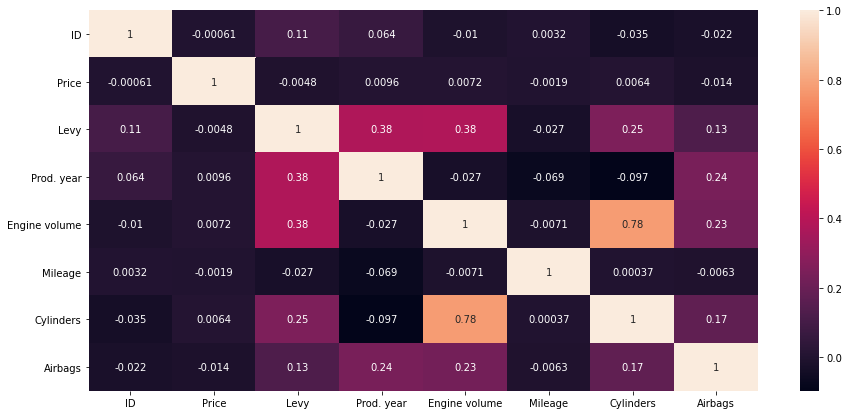

In [334]:
plt.figure(figsize=(15,7))
sns.heatmap(train.corr(), annot = True)
plt.show()

**Observation**
- post hoc test in non-significant p values

In [300]:
from statsmodels.stats.weightstats import ttest_ind

def get_indipendence(feature_name, percent):    
    cat_values = list(sample[feature_name].unique())
    n = len(cat_values)
    model_pairs = []
    for i in range(n-1):
        for j in range(i+1,n):
            if (cat_values[i],cat_values[j]) not in model_pairs or (cat_values[j],cat_values[i]) not in model_pairs:
                model_pairs.append((cat_values[i],cat_values[j]))

    mem_j = []
    similar_volumes = {}
    for i, j in model_pairs:
        t = ttest_ind(sample[sample[feature_name] == i]['Price'], sample[sample[feature_name] == j]['Price'])
        if t[1]> percent/100:
            if i not in similar_volumes:
                similar_volumes[i] = []
                if i not in mem_j and j not in mem_j:
                    mem_j.append(i)
                    similar_volumes[i] = [j]
            else:
                if j not in mem_j or i not in mem_j:
                    mem_j.append(j)
                    similar_volumes[i].append(j)
    most_similar_values={}
    for i in similar_volumes:
        if len(similar_volumes[i])!=0:
            most_similar_values[i] = similar_volumes[i]
    return most_similar_values

#### Model

In [235]:
similar_volumes = get_indipendence('Model', 90)
print(f"Model with {i}% similar data",similar_volumes)

Model with 90% similar data {'31514': ['Fusion', 'Focus', '318', 'Outback', '328'], 'Camry SE': ['X5', 'Tucson', 'REXTON', 'Mazda 6', 'Sorento', 'L 200', 'Ghibli', 'Camaro', 'CLA 250', 'S 550'], 'Prius': ['Octavia', 'C-MAX', 'E 350', 'Aqua G', 'Picanto', 'Grand Vitara', 'tC', 'ISIS', 'Volt', 'C 200', 'Forester', '320 DIESEL', '4Runner', 'Accent', 'Navigator', 'ES 350', 'Versa', 'FIT fit', 'HS 250h', 'Legacy'], 'Cr-v': ['A4 B6', 'Picanto', 'C 230', 'C 200', '320 DIESEL', 'FIT Premiym', '3.20E+38', 'E 550', 'Navigator', 'HS 250h'], 'Corolla': ['FIT', 'Escape', 'Camry', 'Camry sel', 'Outlander', 'ML 350', 'C 280', 'GLA 250', 'Tiguan', 'X-Terra', 'X5 x5', 'Sonata Limited', 'Jetta se'], 'Altima': ['A4', '1000'], 'H1': ['Actyon', 'Pathfinder', 'X1', 'CC'], '500 Abarth': ['320', 'Aqua', 'Q7', 'Prius C', 'Tacoma', 'I30', 'RX 350', 'GX 470', 'Cerato'], 'Optima': ['CX-7', 'Impreza G4', 'Viano', 'Camry sel', 'A5', 'Jetta', 'Elantra limited', 'ML 55 AMG', 'Genesis', 'GLA 250', 'Tiguan', 'Fusion 20

- Model can get confused with some model names.

##### Engine VOlume

In [301]:
similar_volumes = get_indipendence('Enginevolume', 95)

In [302]:
similar_volumes 

{2.0: [1.7, 2.1, 4.7],
 2.5: [1.6, 1.7],
 1.8: [2.7, 2.9],
 1.3: [1.9, 5.9],
 1.6: [2.1, 4.7],
 2.2: [2.3],
 3.5: [3.8],
 3.7: [3.8],
 3.3: [1.9, 5.4]}

- Here we can see 95% similar engine volumes 

##### Manufacturer

In [296]:
similar_volumes = get_indipendence('Manufacturer', 90)
similar_volumes

{'TOYOTA': ['HONDA', 'AUDI'],
 'NISSAN': ['SKODA', 'SCION', 'LINCOLN'],
 'HYUNDAI': ['CADILLAC'],
 'FIAT': ['SUBARU', 'MAZDA', 'SKODA'],
 'FORD': ['MERCEDES-BENZ', 'INFINITI'],
 'SSANGYONG': ['LAND ROVER', 'GAZ'],
 'SUBARU': ['LINCOLN'],
 'BMW': ['LEXUS'],
 'CHEVROLET': ['MITSUBISHI'],
 'OPEL': ['VAZ'],
 'JEEP': ['LAND ROVER'],
 'LEXUS': ['CADILLAC'],
 'LAND ROVER': ['MASERATI']}

-  Manufacturers that match 99% of pricing mean

##### Category

In [292]:
for i in range(80,100,10):
    similar_volumes = get_indipendence('Category', i)
    print(f"Categories having {i}% similar data",similar_volumes)

Categories having 80% similar data {'Minivan': ['Coupe', 'Pickup'], 'Coupe': ['Microbus']}
Categories having 90% similar data {'Minivan': ['Coupe', 'Pickup']}


**Observation**
- as we can see there is 90% similarity between these categories we can merge them into one

##### Fuel Type

In [293]:
for i in range(20,100,10):
    similar_volumes = get_indipendence('Fueltype', i)
    print(f"at {i}% similar data",similar_volumes)

at 20% similar data {'Hybrid': ['LPG']}
at 30% similar data {'Hybrid': ['LPG']}
at 40% similar data {}
at 50% similar data {}
at 60% similar data {}
at 70% similar data {}
at 80% similar data {}
at 90% similar data {}


**Observation**
- as we can see there is only 20% similarity between values so we dont need to merge categories

#### Color

In [317]:
for i in range(50,100,10):
    similar_volumes = get_indipendence('Color', i)
    print(f"at {i}% similar data",similar_volumes)
    print()

at 50% similar data {'Yellow': ['Silver', 'White', 'Black', 'Blue', 'Carnelian red', 'Grey', 'Red', 'Beige'], 'Silver': ['Carnelian red', 'Beige', 'Pink'], 'Blue': ['Sky blue'], 'Purple': ['Green', 'Orange', 'Golden'], 'Green': ['Golden', 'Pink']}

at 60% similar data {'Yellow': ['Silver', 'White', 'Black', 'Blue', 'Carnelian red', 'Grey', 'Red', 'Beige'], 'Silver': ['Carnelian red', 'Beige'], 'Blue': ['Pink'], 'Purple': ['Green', 'Orange', 'Golden'], 'Green': ['Golden', 'Pink'], 'Red': ['Sky blue']}

at 70% similar data {'Yellow': ['Silver', 'Black', 'Blue', 'Carnelian red', 'Grey', 'Beige'], 'Silver': ['Carnelian red', 'Beige'], 'Purple': ['Green', 'Orange', 'Pink'], 'Green': ['Golden', 'Pink']}

at 80% similar data {'Yellow': ['Silver', 'Blue', 'Grey', 'Beige'], 'Silver': ['Carnelian red'], 'Purple': ['Green', 'Orange'], 'Carnelian red': ['Red'], 'Green': ['Pink'], 'Golden': ['Pink']}

at 90% similar data {'Yellow': ['Silver', 'Blue', 'Beige'], 'Purple': ['Green'], 'Green': ['Pink']

#### Cylinders

In [322]:
for i in range(50,100,10):
    similar_volumes = get_indipendence('Cylinders', i)
    print(f"at {i}% similar data",similar_volumes)
    print()

at 50% similar data {4.0: [5.0, 1.0], 6.0: [5.0], 2.0: [3.0]}

at 60% similar data {4.0: [5.0, 1.0], 6.0: [5.0], 2.0: [3.0]}

at 70% similar data {4.0: [5.0, 1.0], 6.0: [5.0]}

at 80% similar data {4.0: [5.0], 6.0: [5.0]}

at 90% similar data {4.0: [5.0]}



**Observation**
- 4.0 cylinder is having 90% similarity with cylinder 5

#### Merging color categories having similar price

In [1]:
merge_dict = get_indipendence('Color', 90)

print(merge_dict)
val_mem = []

def merge_val(x, merge_dict):
    merge_values = {}
    for key in merge_dict.items():
        if key not in val_mem:
            val_mem.append(merge_dict[key])
            for i in merge_dict['key']:
                merge_values[i] = key
    return merge_values

# new_col = sample["Color"].apply(lambda x:merge_groups(x,merge_dict))

NameError: name 'get_indipendence' is not defined

In [332]:
new_col.value_counts()

new_color        219
Black            208
White            180
Grey              95
Red               32
Purple            18
Carnelian red     12
Brown              9
Sky blue           7
Golden             6
Yellow             6
Orange             6
Green              2
Name: Color, dtype: int64

#### Experimenting with models after grouping

In [129]:
X_train_mod = X_train.drop(columns=['Leather interior'])

X_test_mod = X_test.drop(columns=['Leather interior'])

X_valid_mod = X_valid.drop(columns=['Leather interior'])

y_valid = valid['Price']

rf = RandomForestRegressor(max_depth=50,n_estimators=500)
rf.fit(X_train, y_train)
print('Test data:',r2_score(y_test, rf.predict(X_test)))
print('Alien data:',r2_score(y_valid, rf.predict(X_valid)))

rf_mod = RandomForestRegressor(max_depth=50,n_estimators=500)
rf_mod.fit(X_train_mod, y_train)
print('On modified Test data:',r2_score(y_test, rf_mod.predict(X_test_mod)))
print('On modified Alien data:',r2_score(y_valid,rf_mod.predict(X_valid_mod)))

Test data: 0.8013886865934801
Alien data: 0.7144021759428978
On modified Test data: 0.7999869013196796
On modified Alien data: 0.7072305747764933
